In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# reading the dataset into memory
df = pd.read_csv('https://canvas.wlv.ac.uk/courses/41905/files/6902583/download?download_frd=1&verifier=UcopI6blzAfWBl4Fz9MMdR88ZBd8zqdTQge3CR19')
df.head()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [77]:
# getting sum of empty rows in dataset

print(df.isna().sum())

Name                    0
Games Played            0
Minutes Played          0
Points Per Game         0
Field Goals Made        0
Field Goal Attempts     0
Field Goal Percent      0
3 Point Made            0
3 Point Attempt         0
3 Point Percent        11
Free Throw Made         0
Free Throw Attempts     0
Free Throw Percent      0
Offensive Rebounds      0
Defensive Rebounds      0
Rebounds                0
Assists                 0
Steals                  0
Blocks                  0
Turnovers               0
TARGET_5Yrs             0
dtype: int64


In [78]:
# filling NaN with the mean of the column
df['3 Point Percent'] = df['3 Point Percent'].fillna(df['3 Point Percent'].mean())

# confirming change made
df.isna().sum()

Name                   0
Games Played           0
Minutes Played         0
Points Per Game        0
Field Goals Made       0
Field Goal Attempts    0
Field Goal Percent     0
3 Point Made           0
3 Point Attempt        0
3 Point Percent        0
Free Throw Made        0
Free Throw Attempts    0
Free Throw Percent     0
Offensive Rebounds     0
Defensive Rebounds     0
Rebounds               0
Assists                0
Steals                 0
Blocks                 0
Turnovers              0
TARGET_5Yrs            0
dtype: int64

In [79]:
# checking for duplicate rows
# df[df.duplicated()]

In [80]:
# getting the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1340 non-null   object 
 1   Games Played         1340 non-null   int64  
 2   Minutes Played       1340 non-null   float64
 3   Points Per Game      1340 non-null   float64
 4   Field Goals Made     1340 non-null   float64
 5   Field Goal Attempts  1340 non-null   float64
 6   Field Goal Percent   1340 non-null   float64
 7   3 Point Made         1340 non-null   float64
 8   3 Point Attempt      1340 non-null   float64
 9   3 Point Percent      1340 non-null   float64
 10  Free Throw Made      1340 non-null   float64
 11  Free Throw Attempts  1340 non-null   float64
 12  Free Throw Percent   1340 non-null   float64
 13  Offensive Rebounds   1340 non-null   float64
 14  Defensive Rebounds   1340 non-null   float64
 15  Rebounds             1340 non-null   f

In [81]:
# getting a description on the dataset
df.describe()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,15.956966,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


<ipython-input-82-b1a26e246e2c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

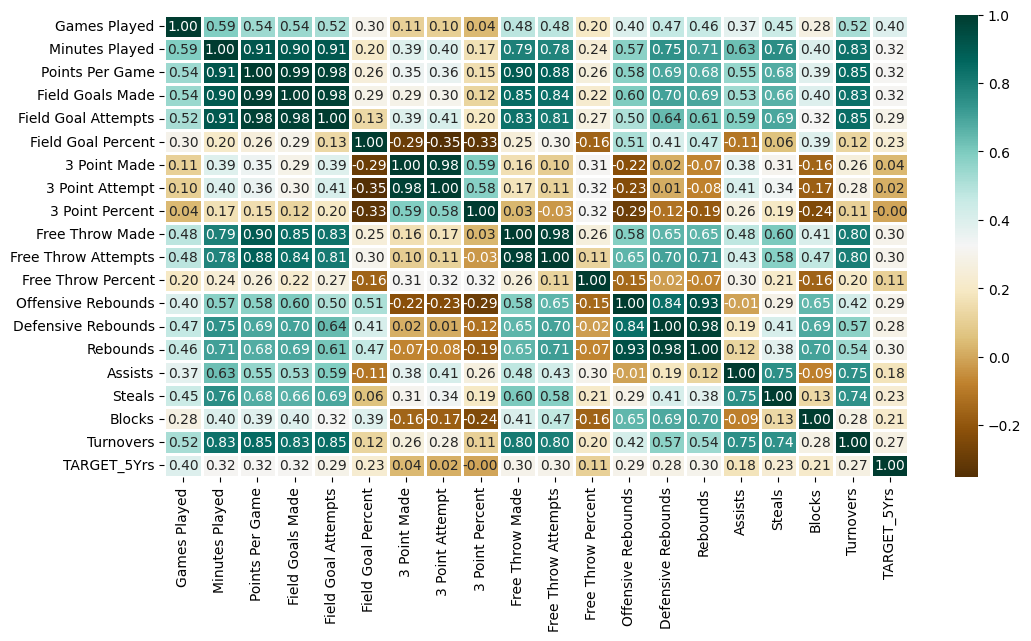

In [82]:
# plotting heat map to se relationship betweeen each column and our target label
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [83]:
# dropping features with the least relationship to the dataset
df2 = df.drop([  '3 Point Percent', '3 Point Made', '3 Point Attempt', 'Name'], axis=1)

In [84]:
X = df2.drop(['TARGET_5Yrs'], axis=1)
y = df2['TARGET_5Yrs']

In [85]:
X.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,36,27.4,7.4,2.6,7.6,34.7,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


In [86]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: TARGET_5Yrs, dtype: int64

In [87]:
#splitting data to training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [89]:
# trying logistic model with multiple parameters to get the best and varied results
model_list = [
    ('LogisticRegression',LogisticRegression() ),
    ('LogisticRegression max_iter=1000',LogisticRegression(max_iter=1000) ),
    ('LogisticRegression solver=LIBLINEAR',LogisticRegression( solver='LIBLINEAR'.lower() ) ),
    ('LogisticRegression solver=LIBLINEAR max_iter=1000',LogisticRegression( solver='LIBLINEAR'.lower(), max_iter=1000) ),
    ('LogisticRegression solver=SAGA',LogisticRegression( solver='SAGA'.lower() )),
    ('LogisticRegression solver=SAGA max_iter=1000',LogisticRegression( solver='SAGA'.lower(), max_iter=1000) ),
]
models = []
accuracies = []

In [90]:
for model_name, model in model_list:
  # creating a Logistic Regression model
  logistic_model = model

  # fitting the model on the training data
  logistic_model.fit(X_train, y_train)

  # trying predictions on the testing data
  logistic_predictions = logistic_model.predict(X_test)

  # evaluating the models performance
  print(f"{model_name}-> Logistic Regression Performance:")
  print(classification_report(y_test, logistic_predictions))
  print("Accuracy:", accuracy_score(y_test, logistic_predictions))
  models.append(model_name)
  accuracies.append(accuracy_score(y_test, logistic_predictions))
  print("\n\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression-> Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.66      0.50      0.57       172
           1       0.73      0.84      0.78       271

    accuracy                           0.71       443
   macro avg       0.69      0.67      0.67       443
weighted avg       0.70      0.71      0.70       443

Accuracy: 0.7065462753950339



LogisticRegression max_iter=1000-> Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.72      0.53      0.61       172
           1       0.75      0.87      0.80       271

    accuracy                           0.74       443
   macro avg       0.73      0.70      0.71       443
weighted avg       0.74      0.74      0.73       443

Accuracy: 0.7381489841986456



LogisticRegression solver=LIBLINEAR-> Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.70      0.52 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression solver=SAGA max_iter=1000-> Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.67      0.51      0.58       172
           1       0.73      0.84      0.78       271

    accuracy                           0.71       443
   macro avg       0.70      0.68      0.68       443
weighted avg       0.71      0.71      0.70       443

Accuracy: 0.7133182844243793





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [91]:
# creating a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# fitting the model on the training data
naive_bayes_model.fit(X_train, y_train)

# making predictions on the testing data
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# evaluating the model's performance
print("Gaussian Naive Bayes Performance:")
print(classification_report(y_test, naive_bayes_predictions))
print("Accuracy:", accuracy_score(y_test, naive_bayes_predictions))
models.append("Gaussian Naive Bayes")
accuracies.append(accuracy_score(y_test, naive_bayes_predictions))

Gaussian Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.51      0.80      0.62       172
           1       0.80      0.51      0.63       271

    accuracy                           0.63       443
   macro avg       0.66      0.66      0.63       443
weighted avg       0.69      0.63      0.63       443

Accuracy: 0.6252821670428894


In [92]:
# the Neural Network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [93]:
epochs=12
batch_size=32

In [94]:
# creating a neural network model
nn_model = Sequential()
nn_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(units=1, activation='sigmoid'))

In [95]:
# compiling the model the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fitting the model
nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/12
29/29 [==============================] - 1s 10ms/step - loss: 1.5167 - accuracy: 0.5753 - val_loss: 0.7244 - val_accuracy: 0.5959
Epoch 2/12
29/29 [==============================] - 0s 3ms/step - loss: 0.7420 - accuracy: 0.6076 - val_loss: 0.6440 - val_accuracy: 0.6704
Epoch 3/12
29/29 [==============================] - 0s 4ms/step - loss: 0.6343 - accuracy: 0.6433 - val_loss: 0.6190 - val_accuracy: 0.6817
Epoch 4/12
29/29 [==============================] - 0s 5ms/step - loss: 0.6069 - accuracy: 0.6711 - val_loss: 0.6109 - val_accuracy: 0.6953
Epoch 5/12
29/29 [==============================] - 0s 3ms/step - loss: 0.6104 - accuracy: 0.6678 - val_loss: 0.5985 - val_accuracy: 0.6930
Epoch 6/12
29/29 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.6332 - val_loss: 0.6277 - val_accuracy: 0.6230
Epoch 7/12
29/29 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.6745 - val_loss: 0.6642 - val_accuracy: 0.6095
Epoch 8/12
29/29 [=

In [96]:
# Evaluate the model's performance
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)
print(f"Neural Network Performance: Accuracy = {nn_accuracy}")
models.append("Neural Network Performance")
accuracies.append(accuracy_score(y_test, naive_bayes_predictions))

14/14 [==============================] - 0s 3ms/step - loss: 0.5803 - accuracy: 0.7178
Neural Network Performance: Accuracy = 0.7178329825401306


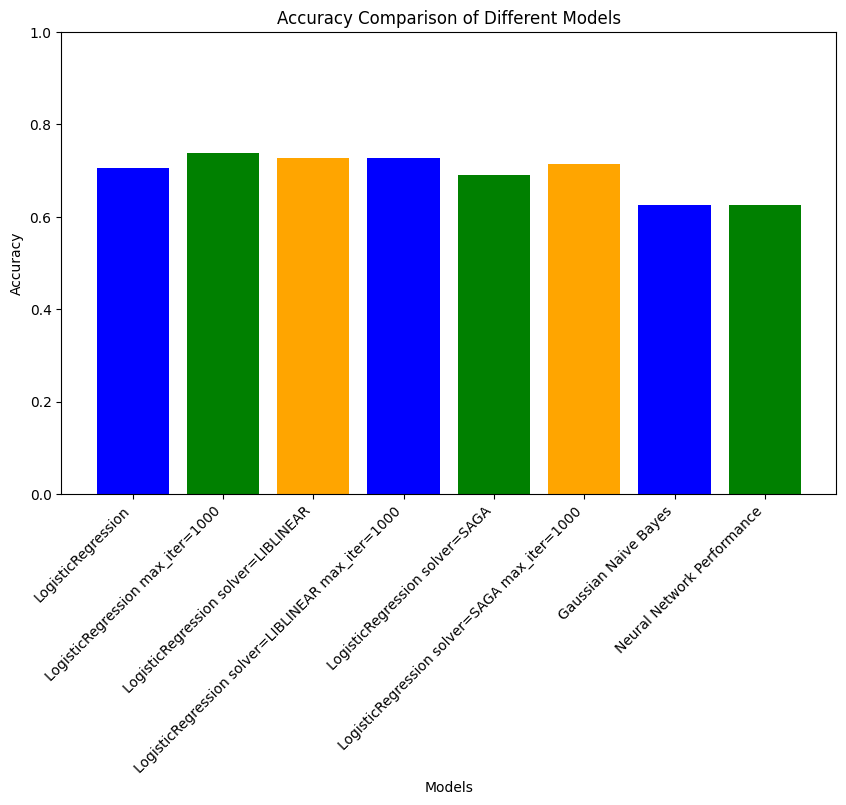

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have accuracy values for each model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
nn_accuracy = nn_accuracy  # Assuming you have evaluated the neural network model

# Bar plot for model comparison


plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0, 1])  # Set the y-axis limit to match accuracy range (0 to 1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()